<a href="https://colab.research.google.com/github/lek-bon/finance_theory/blob/main/Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
uploaded = files.upload()

Saving flotation-cell.csv to flotation-cell.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
fcdata = pd.read_csv('flotation-cell.csv', index_col=0)
print(fcdata.head())

                      Feed rate  Upstream pH  CuSO4 added  Pulp level  \
Date and time                                                           
15/12/2004 19:57:01  341.049347    10.820513     7.995605   24.443470   
15/12/2004 19:57:31  274.270782    10.827351     7.786569   27.819294   
15/12/2004 19:58:01  334.836761    10.854701     7.655922   30.335533   
15/12/2004 19:58:32  323.605927    10.885470     7.838828   30.663738   
15/12/2004 19:59:03  322.341309    10.851282     7.995605   30.288647   

                     Air flow rate  
Date and time                       
15/12/2004 19:57:01       2.802198  
15/12/2004 19:57:31       2.798535  
15/12/2004 19:58:01       2.805861  
15/12/2004 19:58:32       2.802198  
15/12/2004 19:59:03       2.805861  


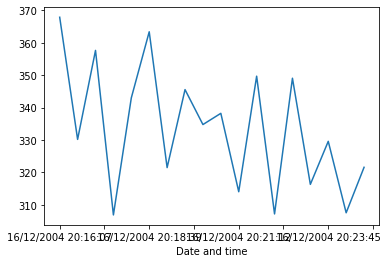

In [4]:
selected = fcdata.loc[('16/12/2004 20:16:00' < fcdata.index) & (fcdata.index < '16/12/2004 20:25:00'),'Feed rate']
selected.plot()
plt.show()

In [5]:
import numpy as np
coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
mse = residuals[0]/(len(selected.index))
nrmse = np.sqrt(mse)/(selected.max() - selected.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope -1.7297902456624175
NRMSE: 0.2741607340730303


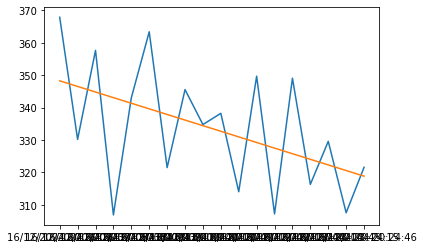

In [6]:
plt.plot(selected)
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))])
plt.show()